In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
titanic_train=pd.read_csv('Titanic-Dataset.csv')
del titanic_train['Ticket']

In [44]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [45]:
titanic_train.sample(10,random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,15.2458,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,30.5000,C106,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,153.4625,C125,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,164.8667,C7,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,91.0792,B49,C
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,7.2292,NaN,C


In [46]:
titanic_train.shape

(891, 11)

In [47]:
titanic_train.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [48]:
#titanic_train.groupby('Ticket').Survived.agg(['count','mean']).sort_values('count',ascending=False)

In [49]:
titanic_train['last_name']=titanic_train.Name.apply(lambda x : x.split(',')[0])
print(titanic_train['last_name'])


0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: last_name, Length: 891, dtype: object


In [50]:
df=titanic_train.groupby('last_name').Survived.agg(['mean','count']).sort_values('count',ascending=False)
df[(df['count']>1)&(df['count']<10)]

,mean,count
last_name,,
Andersson,0.222222,9
Sage,0.000000,7
Carter,0.666667,6
Goodwin,0.000000,6
Johnson,0.500000,6
...,...,...
Wick,1.000000,2
Allen,0.500000,2
Barbara,0.000000,2


In [51]:
titanic_train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='Age'>

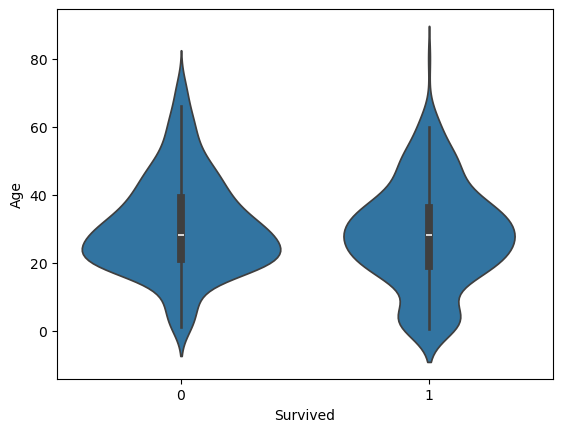

In [52]:
import seaborn as sns
sns.violinplot(x='Survived',y='Age',data=titanic_train)

In [53]:
titanic_train.groupby(['Parch','Sex']).Survived.mean()

Parch  Sex   
0      female    0.788660
       male      0.165289
1      female    0.766667
       male      0.327586
2      female    0.612245
       male      0.322581
3      female    0.750000
       male      0.000000
4      female    0.000000
       male      0.000000
5      female    0.250000
       male      0.000000
6      female    0.000000
Name: Survived, dtype: float64

In [54]:
titanic_train[titanic_train['Parch']==0].Survived.mean()

np.float64(0.34365781710914456)

In [55]:
titanic_train.select_dtypes(include='number').corr()[['Survived']].T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,-0.005007,1.0,-0.338481,-0.077221,-0.035322,0.081629,0.257307


In [56]:
titanic_train.groupby(['SibSp','Sex']).Survived.mean()

SibSp  Sex   
0      female    0.787356
       male      0.168203
1      female    0.754717
       male      0.310680
2      female    0.769231
       male      0.200000
3      female    0.363636
       male      0.000000
4      female    0.333333
       male      0.083333
5      female    0.000000
       male      0.000000
8      female    0.000000
       male      0.000000
Name: Survived, dtype: float64

In [59]:
titanic_train.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [60]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'last_name'],
      dtype='object')

In [61]:
titanic_train.groupby('Cabin').Survived.mean()

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64

In [62]:
titanic_train['Cabin']=titanic_train['Cabin'].apply(lambda x : x[0] if not pd.isna(x) else x)
df=titanic_train.groupby('Cabin').Survived.mean().sort_values(ascending=False).to_frame()
df

,Survived
Cabin,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
T,0.000000


<Axes: ylabel='Cabin'>

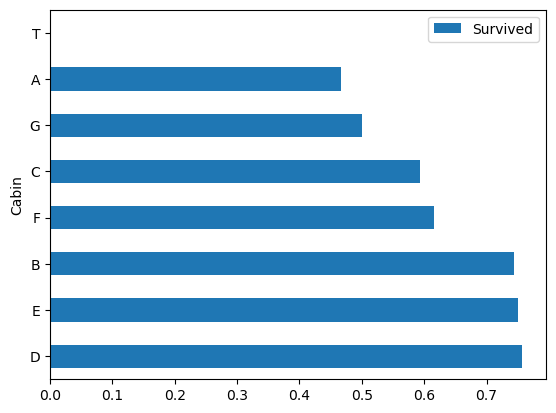

In [63]:
df.plot.barh()

In [133]:
#from sklearn.model_selection import train_test_split
#x_train,x_test=train_test_split(titanic_train,test_size=0.25,random_state=0)

In [151]:
 
titanic_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,last_name
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,7.8958,NaN,S,Nenkoff
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0000,NaN,S,Knight
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,37.0042,NaN,C,Mallet
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,79.2000,B,C,Giglio
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,C,S,Peuchen
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,10.1708,NaN,S,Dakic
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,27.7500,NaN,S,West
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,6.4958,NaN,S,Wiklund
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0000,NaN,S,Parr
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,13.0000,E,S,Webber


In [152]:
titanic_train.shape

(891, 12)

In [155]:
numeric_features=['Age','SibSp','Parch','Fare']
num_features=titanic_train[numeric_features].copy()
num_features.sample(10)

,Age,SibSp,Parch,Fare
716,38.0,0,0,227.5250
375,NaN,1,0,82.1708
465,38.0,0,0,7.0500
481,NaN,0,0,0.0000
285,33.0,0,0,8.6625
729,25.0,1,0,7.9250
703,25.0,0,0,7.7417
137,37.0,1,0,53.1000
687,19.0,0,0,10.1708
472,33.0,1,2,27.7500


In [156]:
num_features.loc[num_features['Age'].isna(),'Age']=num_features['Age'].mean()

In [157]:
num_features

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [158]:
from sklearn.preprocessing import OneHotEncoder
catg_features=['Cabin','Pclass','Embarked','Sex']
catg=titanic_train[catg_features].copy()
catg

,Cabin,Pclass,Embarked,Sex
0,NaN,3,S,male
1,C,1,C,female
2,NaN,3,S,female
3,C,1,S,female
4,NaN,3,S,male
...,...,...,...,...
886,NaN,2,S,male
887,B,1,S,female
888,NaN,3,S,female
889,C,1,C,male


In [159]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(drop='first')
cat_features=enc.fit_transform(catg).todense()
cat=pd.DataFrame(cat_features,columns=enc.get_feature_names_out())
cat

,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Embarked_nan,Sex_male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_f=scaler.fit_transform(num_features)
num=pd.DataFrame(num_f,columns=num_features.columns)
num

,Age,SibSp,Parch,Fare
0,-0.592481,0.432793,-0.473674,-0.502445
1,0.638789,0.432793,-0.473674,0.786845
2,-0.284663,-0.474545,-0.473674,-0.488854
3,0.407926,0.432793,-0.473674,0.420730
4,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671
887,-0.823344,-0.474545,-0.473674,-0.044381
888,0.000000,0.432793,2.008933,-0.176263
889,-0.284663,-0.474545,-0.473674,-0.044381


In [163]:
df=pd.concat([num,cat],axis=1)
df

,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Embarked_nan,Sex_male
0,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.638789,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.407926,0.432793,-0.473674,0.420730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
887,-0.823344,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
889,-0.284663,-0.474545,-0.473674,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(df,test_size=0.25,random_state=0)
y_train,y_test=train_test_split(titanic_train['Survived'],test_size=0.25,random_state=0)

In [172]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
#y_train=titanic_train.Survived
reg.fit(x_train,y_train)

LogisticRegression()

In [173]:
from sklearn.metrics import classification_report
#y_test=titanic_train.Survived

print(classification_report(y_test,reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       139
           1       0.75      0.74      0.74        84

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,reg.predict(x_test))
cm

array([[118,  21],
       [ 22,  62]])